In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


## Data set input here

In [4]:
df = pd.read_csv("data/sentimentdataset.csv")
path = r'data/sentimentdataset_clean.xlsx'
df2 = pd.read_excel(path, sheet_name=0, index_col=False).reset_index(drop=True)
#df3=pd.read_excel(path,sheet_name=1)

#df2.head()

HASHTAG & plot them on Bar Chart

Extract and Count the Top 10 Hashtags

In [5]:
from collections import Counter
import itertools

# Extract all hashtags and split them into individual tags
all_hashtags = df2['Hashtags'].str.split().tolist()
all_hashtags_flat = list(itertools.chain.from_iterable(all_hashtags))

# Count the frequency of each hashtag
hashtag_counts = Counter(all_hashtags_flat)

# Get the top 10 most common hashtags
top_10_hashtags = hashtag_counts.most_common(10)
top_10_hashtags_list = [hashtag for hashtag, count in top_10_hashtags]


Filter Data for Top 10 Hashtags and Group by Country

In [10]:
# Filter the data to include only rows with the top 10 hashtags
filtered_data_top10 = df2[df2['Hashtags'].apply(lambda x: any(tag in x for tag in top_10_hashtags_list))]

# Explode the hashtags into individual rows
exploded_data = filtered_data_top10.assign(Hashtag=filtered_data_top10['Hashtags'].str.split()).explode('Hashtag')

# Filter to include only top 10 hashtags
exploded_data = exploded_data[exploded_data['Hashtag'].isin(top_10_hashtags_list)]

# Group by Hashtag and Country and count the occurrences
country_hashtag_counts = exploded_data.groupby(['Country', 'Hashtag']).size().reset_index(name='Count')


Visualize Top 10 Hashtags by Country

/var/folders/0_/ryhxg2cd71z1f4879zqk8ffr0000gn/T/ipykernel_1476/2154306535.py:5: UserWarning: The palette list has more values (30) than needed (19), which may not be intended.
  sns.barplot(x='Hashtag', y='Count', hue='Country', data=country_hashtag_counts, palette=palette)


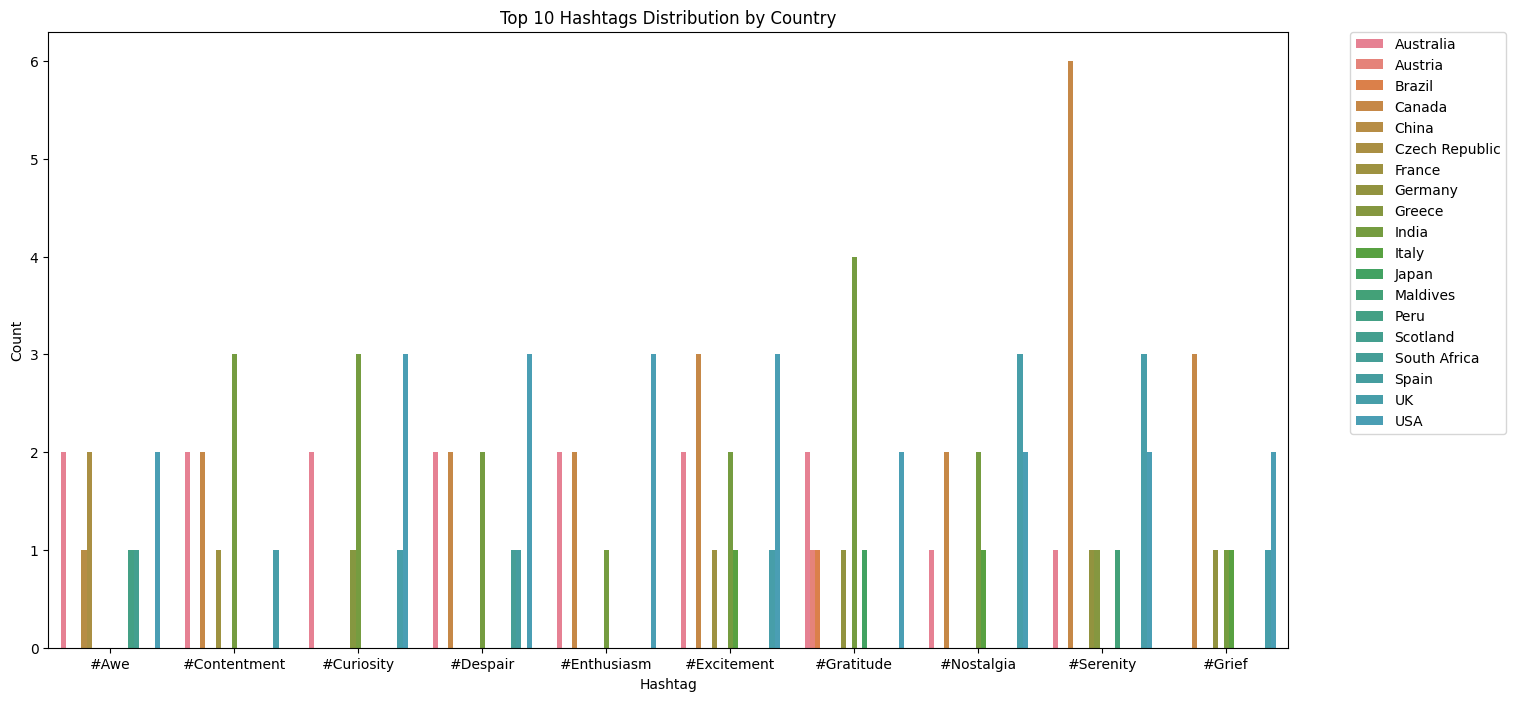

In [7]:


# Use the 'husl' palette for 20 distinct colors
palette = sns.color_palette("husl", n_colors=30)

plt.figure(figsize=(16, 8))
sns.barplot(x='Hashtag', y='Count', hue='Country', data=country_hashtag_counts, palette=palette)

plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.title('Top 10 Hashtags Distribution by Country')

# Move the legend box outside the plot area to the right
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.0)

plt.show()


Show Hashtags According to Sentiment Categories

In [8]:
# Filter sentiment_hashtag_counts to keep only the top 10 hashtags
top_sentiment_hashtags = sentiment_hashtag_counts[sentiment_hashtag_counts['Hashtag'].isin(top_10_hashtags_list)]

# Plot the bar chart
plt.figure(figsize=(16, 8))
sns.barplot(x='Hashtag', y='Count', hue='General_Sentiment', data=top_sentiment_hashtags, palette='coolwarm')

# Set plot labels and title
plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.title('Top 10 Hashtags by Sentiment Category')

# Rotate x-axis labels if necessary for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

NameError: name 'sentiment_hashtag_counts' is not defined

Pie chart shows

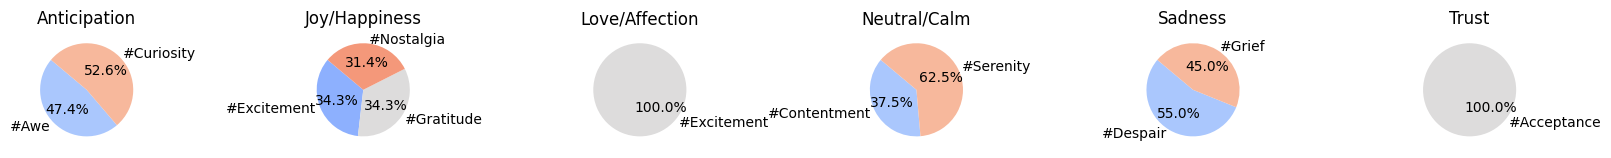

In [32]:

# Filter top_sentiment_hashtags to keep only the top 10 hashtags
top_sentiment_hashtags_filtered = top_sentiment_hashtags[top_sentiment_hashtags['Hashtag'].isin(top_10_hashtags_list)]

# List of unique sentiments
sentiments = top_sentiment_hashtags_filtered['General_Sentiment'].unique()

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=len(sentiments), figsize=(16, 8))

# Iterate over each sentiment and plot a pie chart
for sentiment, ax in zip(sentiments, axes):
    # Filter data for the current sentiment
    data = top_sentiment_hashtags_filtered[top_sentiment_hashtags_filtered['General_Sentiment'] == sentiment]
    
    # Pie chart
    ax.pie(data['Count'], labels=data['Hashtag'], autopct='%1.1f%%', startangle=140, 
    
           colors=sns.color_palette('coolwarm', n_colors=len(data)))
    ax.set_title(f'{sentiment} Sentiment')

# Adjust layout
plt.tight_layout()
plt.show()


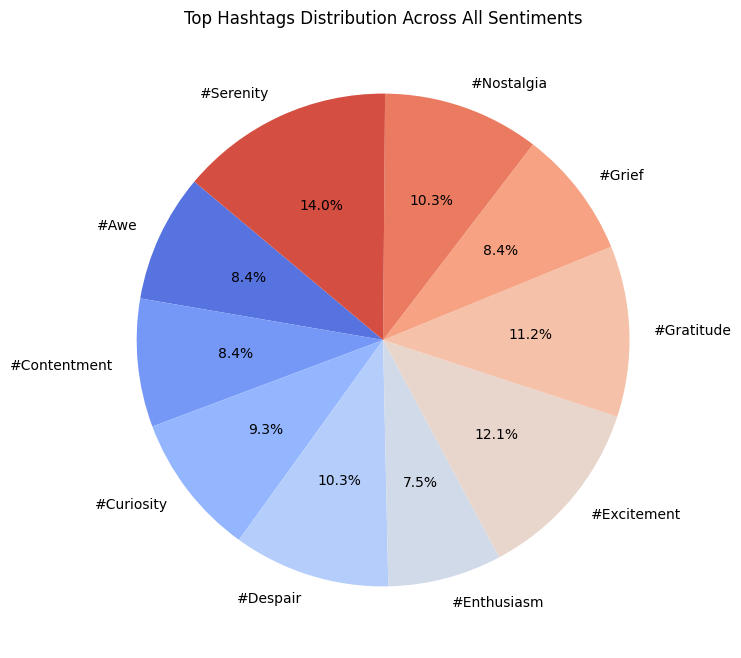

In [35]:

# Aggregate counts for all sentiments combined
aggregated_data = top_sentiment_hashtags.groupby('Hashtag')['Count'].sum().reset_index()

# Pie chart
plt.figure(figsize=(10, 8))
plt.pie(aggregated_data['Count'], labels=aggregated_data['Hashtag'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('coolwarm', n_colors=len(aggregated_data)))
plt.title('Top Hashtags Distribution Across All Sentiments')
plt.show()
